# Instruções Gerais

*   A atividade é **individual**. Cópias e plágios não serão tolerados. Caso seja identificado, **nota zero** será atribuída à todos os envolvidos.
*   Data de entrega: **21/10/2021, até as 23:59h**

  * Apenas pelo **Classroom**
  * Façam uma cópia do notebook, e trabalhem nela para a entrega até o prazo definido
  * **Atentem para todos os pontos de `# TODO:`**, pois estes são os pontos de implementação
* Sobre política de atrasos: 
  * cada aluno terá a **tolerância de 2 dias de atraso, considerado todos os exercícios** propostos. 
  * A partir do terceiro dia, 60% da nota obtida será computada. 
  * Do quarto dia em diante, não será atribuída nota alguma.



# Imports iniciais

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

# Definição de um model simples para testes usando sklearn

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

# Carregando e Divisão de Dados

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

## Validação cruzada

### Holdout

##################################################
Exemplos de Dados
##################################################
X1 - Train Features: 
 [[5.1 3.5 1.4 0.2]
 [6.6 3.  4.4 1.4]
 [6.4 2.9 4.3 1.3]]
X1 - Shape (Linhas X Colunas): (105, 4)
##################################################
y1 - Train Target: 
 [0 1 1]
y1 - Shape (Linhas X Colunas): (105,)
##################################################
X2 - Test Features: 
 [[5.5 4.2 1.4 0.2]
 [5.  2.3 3.3 1. ]
 [5.1 3.8 1.5 0.3]]
X2 - Shape (Linhas X Colunas): (45, 4)
##################################################
y2 - Test Target: 
 [0 1 0]
y2 - Shape (Linhas X Colunas): (45,)
##################################################
ACC TRAINING: 0.9714285714285714
ACC TEST: 0.9555555555555556
##################################################
ACC TRAINING: 0.9714285714285714
ACC TEST: 0.9555555555555556
##################################################
Outras Metricas
              precision    recall  f1-score   support

       

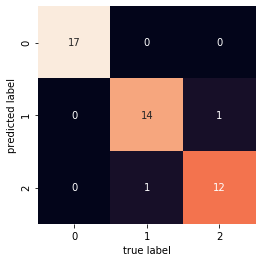

In [93]:
# defina a separação dos dados (X, y) utilizando 70% para treino e 30% para teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separando os dados em teste/train holding out 30% = 0.3 of the data for testing
X1, X2, y1, y2 = train_test_split(x,y,test_size=0.3) # TODO

# vizualizar amostras dos dados
print('#'*50)
print('Exemplos de Dados')
print('#'*50)
print('X1 - Train Features: \n',X1[:3])
print(f'X1 - Shape (Linhas X Colunas): {X1.shape}')
print('#'*50)
print('y1 - Train Target: \n',y1[:3])
print(f'y1 - Shape (Linhas X Colunas): {y1.shape}')
print('#'*50)
print('X2 - Test Features: \n',X2[:3])
print(f'X2 - Shape (Linhas X Colunas): {X2.shape}')
print('#'*50)
print('y2 - Test Target: \n',y2[:3])
print(f'y2 - Shape (Linhas X Colunas): {y2.shape}')
print('#'*50)

# TODO: treine e avalie o modelo com os dados separados

# treine com os valores de treinameto
model.fit(X1,y1)

# Predizer valores apartir das features de teste/train
predicaoTrain = model.predict(X1)
predicaoTeste = model.predict(X2)

# Calcular acuracia com a função score
acuraciaTrain = model.score(X1,y1)
acuraciaTeste = model.score(X2,y2)
# Accuracia no treinamento e no teste
print(f"ACC TRAINING: {acuraciaTrain}")
print(f"ACC TEST: {acuraciaTeste}")

# Calcular acuracia apartir das predições com a função accuracy_score
acc_train = accuracy_score(y1, predicaoTrain)
acc_test = accuracy_score(y2, predicaoTeste)
print('#'*50)

# Accuracia no treinamento e no teste
print(f"ACC TRAINING: {acc_train}")
print(f"ACC TEST: {acc_test}")
print('#'*50)

# Outras metricas
from sklearn.metrics import classification_report
print(f"Outras Metricas")
print(classification_report(y2, predicaoTeste))
print('#'*50)

from sklearn.metrics import confusion_matrix
import seaborn as sns
MatrixConfusao = confusion_matrix(y2, predicaoTeste)
sns.heatmap(MatrixConfusao.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### K-Folds

É possível usar o módulo [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) do sklearn

In [94]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
folds = 3
# TODO: defina aqui a chamada
cross_validation = cross_val_score(model, x, y, cv=folds)
print(f'Cross Validation Score: {cross_validation}')

Cross Validation Score: [0.98 0.96 0.98]


Ou até expandir para executar o K vezes, seguindo um processo manual

In [95]:
from sklearn.model_selection import KFold
x_times = 3
k_folds = 3

for k in range(x_times):
    splits = KFold(n_splits=k_folds, shuffle=True)
    print('Splits: ',splits)
    # a chamada .split() retorna os índices que devem ser usados em cada rodada
    for train, test in splits.split(x):
        
        train_data = x[train]
        train_target = y[train]
        test_data = x[test]
        test_target = y[test]   

      # TODO: Treino e avaliação
    
        model.fit(train_data,train_target)
        print(f'Score: {model.score(test_data,test_target)}')
        #X1, X2, y1, y2 = x[train], x[test], y[train], y[test]
        #model.fit(X1,y1)
        #print(f'Second Split Score: {model.score(X2,y2)}')


Splits:  KFold(n_splits=3, random_state=None, shuffle=True)
Score: 0.96
Score: 0.96
Score: 0.94
Splits:  KFold(n_splits=3, random_state=None, shuffle=True)
Score: 0.98
Score: 0.98
Score: 0.96
Splits:  KFold(n_splits=3, random_state=None, shuffle=True)
Score: 1.0
Score: 0.94
Score: 0.94


# Regressão Linear

Geração aleatória de um conjunto de dados simples

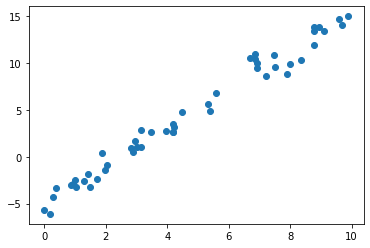

In [96]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Importação e utilização do módulo [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)  para fazer um ajuste linear as dados gerados

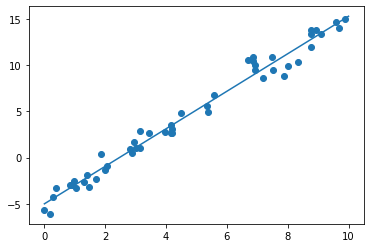

In [97]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

x_fit = np.linspace(0, 10, 1000)
y_fit = model.predict(x_fit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(x_fit, y_fit);

Agora, considere a implementação da Regressão Linear do zero, sem o uso do `sklearn` ou outra biblioteca de Machine Learninng.

In [ ]:
# TODO:

# Máquinas de Vetores de Suporte

Geração de dados iniciais

(50, 2) (50,)


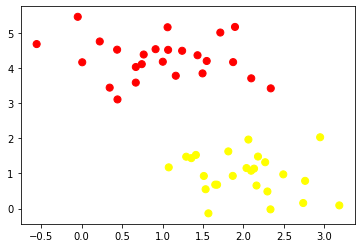

In [103]:
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
print(X.shape,y.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Para definir o modelo, podemos usar módule [`SVC (Support Vector Classifier)`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) do [`sklearn.svm`](https://scikit-learn.org/stable/modules/svm.html#:~:text=Support%20vector%20machines%20(SVMs)%20are,than%20the%20number%20of%20samples.)

In [100]:
from sklearn.svm import SVC

Com teste inicial, podemos treinar e avaliar um modelo com um kernel linear

In [107]:
# TODO: separação dos dados X, y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
print(metrics.accuracy_score(model.predict(X_test), y_test))

1.0


E para problemas não lineares?

Geração de dados

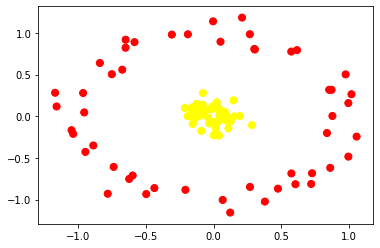

In [108]:
#from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

A partir da visualização anterior dos dados, encontre a melhor configuração para um modelo `SVM` (lembrem-se do `truque do kernel` -- variem este parâmetro [`rbf`, `poly`, `sigmoid`, etc]). Para isso, façam testes paramétricos e avaliem o resultado obtido.

Dica: é possível plotar os vetores de suporte para entender o comportamento após treinamento. Vejam o `model.support_vectors`

In [ ]:
# TODO: 

# Árvores de decisão: classificação de dígitos

Carregamento dos dados

In [109]:
from sklearn.datasets import load_digits
digits = load_digits()

ACC TRAINING: 1.0
ACC TEST: 0.825925925925926
##################################################
ACC TRAINING: 1.0
ACC TEST: 0.825925925925926
##################################################
Outras Metricas
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        43
           1       0.89      0.69      0.78        58
           2       0.81      0.76      0.79        55
           3       0.88      0.79      0.83        56
           4       0.87      0.74      0.80        65
           5       0.80      0.91      0.85        53
           6       0.93      0.89      0.91        57
           7       0.70      0.94      0.80        51
           8       0.71      0.92      0.80        48
           9       0.83      0.80      0.81        54

    accuracy                           0.83       540
   macro avg       0.84      0.83      0.83       540
weighted avg       0.84      0.83      0.83       540

###############################

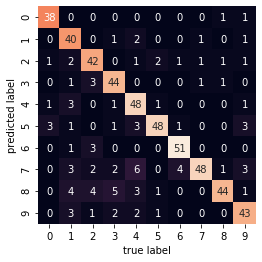

In [114]:
# TODO: façam a separação dos dados utilizando um conjunto holdout 70/30
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data,digits.target,test_size=0.3)

# TODO: treinem o modelo
from sklearn.tree import DecisionTreeClassifier

modelDecisionTree = DecisionTreeClassifier()
modelDecisionTree.fit(Xtrain,ytrain)

# TODO: avaliem o resultado

# Predizer valores apartir das features de teste/train
predicaoTreeTrain = modelDecisionTree.predict(Xtrain)
predicaoTreeTeste = modelDecisionTree.predict(Xtest)

# Calcular acuracia com a função score
acuraciaTreeTrain = modelDecisionTree.score(Xtrain,ytrain)
acuraciaTreeTeste = modelDecisionTree.score(Xtest,ytest)

# Accuracia no treinamento e no teste
print(f"ACC TRAINING: {acuraciaTreeTrain}")
print(f"ACC TEST: {acuraciaTreeTeste}")

# Calcular acuracia apartir das predições com a função accuracy_score
acc_train = accuracy_score(ytrain, predicaoTreeTrain)
acc_test = accuracy_score(ytest, predicaoTreeTeste)
print('#'*50)

# Accuracia no treinamento e no teste
print(f"ACC TRAINING: {acc_train}")
print(f"ACC TEST: {acc_test}")
print('#'*50)

# Outras metricas
from sklearn.metrics import classification_report
print(f"Outras Metricas")
print(classification_report(ytest, predicaoTreeTeste))
print('#'*50)

from sklearn.metrics import confusion_matrix
import seaborn as sns
MatrixConfusao = confusion_matrix(ytest, predicaoTreeTeste)
sns.heatmap(MatrixConfusao.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Ensemble

Escolha pelo menos 2 modelos discutidos para fazer um ensemble utilizando o mesmo conjunto de dados do exemplo anterior

In [ ]:
# TODO: